In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
import warnings; warnings.simplefilter('ignore')
from reactionrnn import reactionrnn #pip install reactionrnn

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [3]:
data = pd.read_csv('../data/cleaned_subset.csv', encoding='latin1')
data = data[['Id', 'Title', 'Description', 'ViewCount', 'LikeCount', 'DislikeCount']]
data = data[data['Id'] != '#NAME?']
data = data.drop_duplicates(subset='Id', keep='last')

data.head()

,Id,Title,Description,ViewCount,LikeCount,DislikeCount
0,AUzyaHo0QQc,b'300 pushups a day for 20 days!! - Results!!',b'**NEW** (2016) Abs Workout for 30 Days | htt...,13577683,40408,10312
1,1Zgtdb7jp60,b'John Cena - gym',"b""Follow John Cena on twitter: http://www.twit...",9986096,37867,1486
2,1Sfii7rnkJQ,b'Bodybuilding Motivation - No Time To Waste',"b""Follow me:\nhttp://instagram.com/shaqx.bb\nh...",8532402,17688,1291
3,UUwSKJjx9Go,b'Most Powerful Home Chest Workout Ever : Buil...,b'http://www.6weeksixpack.com This is one of t...,8301027,46293,2589
4,Yl3NGvna2KA,b'Greg Plitt Best of The Best Workout Video Pr...,b'SIGN UP TODAY - http://bit.ly/jointheranks\r...,7141821,24784,1134


In [3]:
def RemoveByteArrayResidue(s):
    if len(s) > 3:
        if s[0] == 'b':
            if (s[1] == '\'' or s[1] == '\"') and (s[-1] == '\'' or s[-1] == '\"'):
                return s[2:-1]
    return s

# Remove the b'' if it exists
data['Title'] = data['Title'].apply(RemoveByteArrayResidue)
data['Description'] = data['Description'].apply(RemoveByteArrayResidue)

In [15]:
react = reactionrnn()

def predictReactions(s):
    return react.predict(s)
    
data['Reaction To Desc'] = data['Description'].apply(predictReactions)
data['Reaction To Title'] = data['Title'].apply(predictReactions)

In [16]:
data.to_csv('../data/reaction_to_description_title.csv')

(array([ 439.,  824.,  840.,  772.,  773.,  707.,  693.,  573.,  559.,
         538.,  498.,  447.,  430.,  375.,  308.,  261.,  266.,  217.,
         202.,  185.,  152.,  128.,   90.,   83.,   62.,   65.,   51.,
          38.,   19.,   20.,   21.,   14.,    7.,    9.,    6.,    1.,
           3.,    3.,    2.,    1.]),
 array([  6.91869522,   7.15632629,   7.39395736,   7.63158844,
          7.86921951,   8.10685058,   8.34448165,   8.58211273,
          8.8197438 ,   9.05737487,   9.29500594,   9.53263702,
          9.77026809,  10.00789916,  10.24553023,  10.48316131,
         10.72079238,  10.95842345,  11.19605452,  11.4336856 ,
         11.67131667,  11.90894774,  12.14657881,  12.38420989,
         12.62184096,  12.85947203,  13.09710311,  13.33473418,
         13.57236525,  13.80999632,  14.0476274 ,  14.28525847,
         14.52288954,  14.76052061,  14.99815169,  15.23578276,
         15.47341383,  15.7110449 ,  15.94867598,  16.18630705,  16.42393812]),
 <a list of 40 Patch o

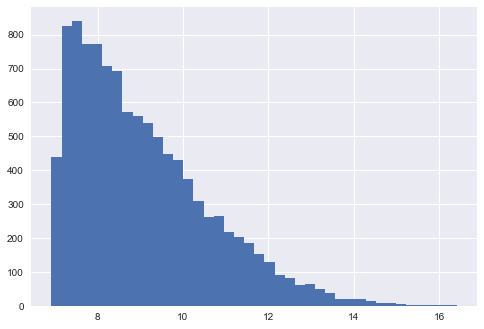

In [12]:
plt.hist(np.log1p(data.ViewCount), 40)